<a href="https://colab.research.google.com/github/zomorodiyan/MAE-5093/blob/main/CP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Computer Project 1 <h1>
<h2> Mehrdad Zomorodiyan <h2>

In [53]:
import numpy as np
import matplotlib.pyplot as plt

<h2> Problem 1 <h2>

In [54]:
#@title define func and its first derivative
def func(x):
    return np.cos(10*x)*np.sin(x)
def firstDerivative(x1):
    return -10 * np.sin(10*x1)*np.sin(x1)+np.cos(10*x1)*np.cos(x1)

In [55]:
#@title define functions lagrange, lagrange first derivative, and second order centered difference methods

def lagrange(x, y, xs):
    poly = np.zeros_like(xs)
    for k in range(len(xs)):
        poly[k] = 0
        for j in range(len(x)):
            tmp = 1
            for i in range(len(x)):
                if i != j:
                    tmp = tmp * (xs[k] - x[i]) / (x[j] - x[i])
            poly[k] = poly[k] + y[j] * tmp
    return poly

def lagrangeDerivative(x, y, xs):
    poly = np.zeros_like(xs)
    for k in range(len(xs)):
        poly[k] = 0
        for j in range(len(x)):
            tmp2 = 0
            for i in range(len(x)):
                if i != j:
                    tmp1 = 1.0 / (x[j] - x[i])
                    tmp = 1
                    for l in range(len(x)):
                        if l != j and l != i:
                            tmp = tmp * (xs[k] - x[l]) / (x[j] - x[l])
                    tmp2 = tmp2 + tmp * tmp1
                    
            poly[k] = poly[k] + y[j] * tmp2
    return poly

def secondCentered(y, h):
    yPrime = np.zeros((len(y)))
    i = 0
    yPrime[i] = (y[i+1] - y[i]) / (h)
    i = len(y) - 1
    yPrime[i] = (y[i] - y[i-1]) / (h)
    for i in range(1, len(y)-1):
        yPrime[i] = (y[i+1] - y[i-1]) / (2*h)
    return yPrime


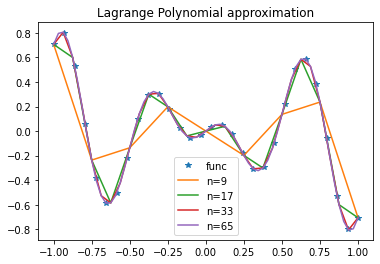

In [56]:
#@title part (i)
fig = plt.figure()
x = np.linspace(-1, 1, 30); y = func(x)
plt.plot(x, y, '*', label='func')

def plot1(number):
  x1 = np.linspace(-1, 1, number)
  p1 = lagrange(x, y, x1)
  plt.plot(x1, p1, label='n='+str(number))

plot1(9); plot1(17); plot1(33); plot1(65)

plt.title( 'Lagrange Polynomial approximation')
plt.legend()



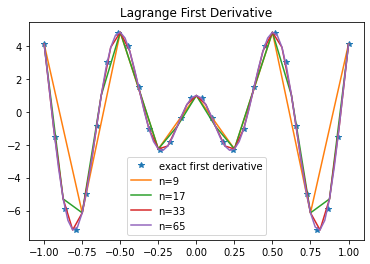

In [57]:
#@title part (ii)
fig = plt.figure()
firstDerivative = -10 * np.sin(10*x)*np.sin(x)+np.cos(10*x)*np.cos(x)
plt.plot(x, firstDerivative, '*', label='exact first derivative')

def plot2(number):
  x1 = np.linspace(-1, 1, number)
  p1 = lagrangeDerivative(x, y, x1)
  plt.plot(x1, p1, label='n='+str(number))
plot2(9); plot2(17); plot2(33); plot2(65)

plt.title( 'Lagrange First Derivative')
plt.legend()



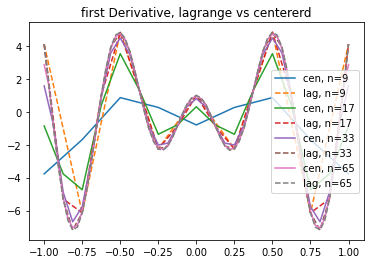

In [58]:
#@title part (iii) second order centered gives bad results for small number of point however for large number both work fine 
def plot3(number):
  x1 = np.linspace(-1, 1, number)
  p1 = lagrangeDerivative(x, y, x1)
  yPrimeC = secondCentered(func(x1), x1[1]-x1[0])
  plt.plot(x1, yPrimeC, label='cen, n='+str(number))
  plt.plot(x1, p1, '--', label='lag, n='+str(number))
  plt.legend(loc=0)

fig = plt.figure()
plot3(9); plot3(17); plot3(33); plot3(65)
plt.title( 'first Derivative, lagrange vs centererd')
plt.legend()

<h1> problem 2 <h1>

In [59]:
#@title define func and its first derivative
def func(x):
    return np.cos(10*x)*np.sin(x)
def firstDerivative(x1):
    return -10 * np.sin(10*x1)*np.sin(x1)+np.cos(10*x1)*np.cos(x1)

In [78]:
#@title define pade, and first derivative of func using it as padeDerivative
def pade(a,b,c,d):
  ac, bc, cc, dc = map(np.array, (a, b, c, d))
  ne = len(d)
  for i in range(1,ne):
      bc[i] = bc[i] - ac[i]*(cc[i-1]/bc[i-1])
      dc[i] = dc[i] - ac[i]*(dc[i-1]/bc[i-1])
  uc = bc    
  uc[-1] = dc[-1]/bc[-1]
  for i in range(ne-2,-1,-1):
      uc[i] = (dc[i] - cc[i]*uc[i+1])/bc[i]
  return uc

def padeDerivative(x):
  n = len(x)-1
  h = x[1] - x[0]
  a, b, c, d = map(np.zeros, (len(x), len(x), len(x), len(x)))
  b[0], b[n] = 1.0, 1.0
  c[0], a[n] = 2.0, 2.0
  i = 0
  d[i] = (1.0/h)*(-2.5*func(x[i])+2*func(x[i+1])+0.5*func(x[i+2]))
  i = n
  d[i] = (1.0/h)*(2.5*func(x[i])-2*func(x[i-1])-0.5*func(x[i-2]))
  for i in range(1, n):
      a[i] = 1.0
      b[i] = 4.0
      c[i] = 1.0
      d[i] = (3.0/h)*(func(x[i+1]) - func(x[i-1]))
  return pade(a,b,c,d)

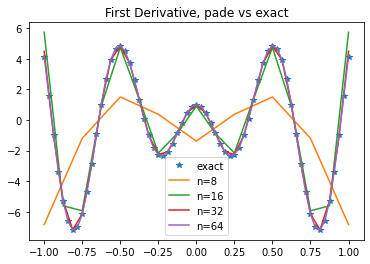

In [61]:
#@title part (i)
x1 = np.linspace(-1, 1,64+1)
yPrime = firstDerivative(x1)
fig = plt.figure()
plt.plot(x1, yPrime, '*', label='exact')
plt.title('First Derivative, pade vs exact')

def plot4(number):
    x = np.linspace(-1, 1, number+1)
    fPrime = padeDerivative(x)
    plt.plot(x, fPrime, label='n='+str(number))
    plt.legend()
plot4(8); plot4(16); plot4(32); plot4(64)

Text(0.5, 0, 'h')

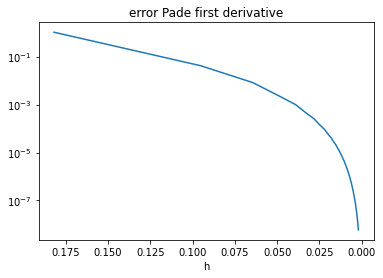

In [62]:
#@title part (ii)
n = range(10, 1000, 10)
error = np.empty(len(n))
h = np.zeros((len(n)))
x0 = 0.5
for i in range(len(n)):
    x = np.linspace(-1, 1, n[i]+1)
    ind = np.argwhere(x>=x0)[0][0]
    fPrime = padeDerivative(x)
    error[i] = np.abs(fPrime[ind] - firstDerivative(x[ind]))
    h[i] = 2.0 / (n[i] + 1)

plt.title('error Pade first derivative')
plt.plot(h, error)
plt.gca().invert_xaxis()
plt.yscale("log")
plt.xlabel('h')

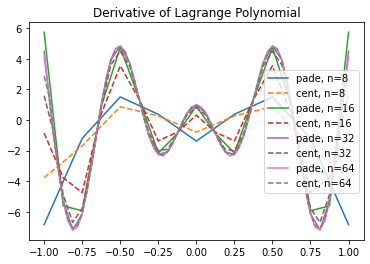

In [63]:
#@title part (iii) for small number of points (8) pade is worse than centered difference from probelm 1, however for larger numbers (16,32,64) pade is more accurate
def plot5(number):
  x = np.linspace(-1, 1, number+1)
  yPrimeC = secondCentered(func(x), x[1]-x[0])
  fPrime = padeDerivative(x)
  plt.plot(x, fPrime, label='pade, n='+str(number))
  plt.plot(x, yPrimeC, '--', label='cent, n='+str(number))
  plt.title( 'Derivative of Lagrange Polynomial')

plot5(8); plot5(16);plot5(32); plot5(64)
plt.legend()

<h1> Problem 3 <h1>


In [69]:
#@title define func and its first and second derivative
def func(x):
    return np.cos(10*x)*np.sin(x)

def firstDerivative(x1):
    return -10 * np.sin(10*x1)*np.sin(x1)+np.cos(10*x1)*np.cos(x1)

def secondDerivative(x1):
    return -20 * np.sin(10*x1)*np.cos(x1)-101*np.cos(10*x1)*np.sin(x1)

Text(0.5, 0, 'delta x')

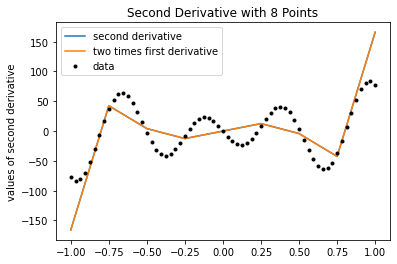

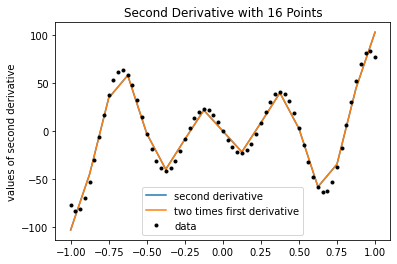

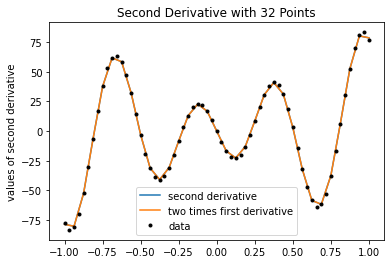

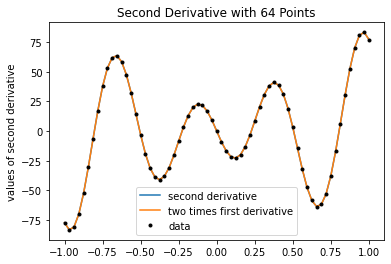

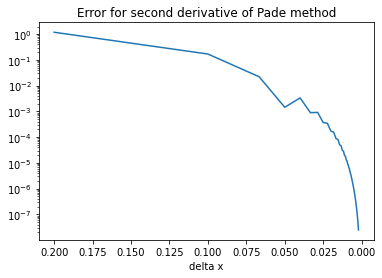

In [83]:
def tdma(a,b,c,d):

    ac, bc, cc, dc = map(np.array, (a, b, c, d))
    ne = len(d)
    for i in range(1,ne):
        bc[i] = bc[i] - ac[i]*(cc[i-1]/bc[i-1])
        dc[i] = dc[i] - ac[i]*(dc[i-1]/bc[i-1])
    uc = bc    
    uc[-1] = dc[-1]/bc[-1]

    for i in range(ne-2,-1,-1):
        uc[i] = (dc[i] - cc[i]*uc[i+1])/bc[i]
    return uc

def padeSecondDerivative(x):

    n = len(x)-1
    h = x[1] - x[0]
    a, b, c, d = map(np.zeros, (len(x), len(x), len(x), len(x)))
    b[0], b[n] = 1.0, 1.0
    c[0], a[n] = 11.0, 11.0
    i = 0
    d[i] = (1.0/(h**2))*(13*func(x[i])-27*func(x[i+1])+15*func(x[i+2])-func(x[i+3]))
    i = n
    d[i] = (1.0/(h**2))*(13*func(x[i])-27*func(x[i-1])+15*func(x[i-2])-func(x[i-3]))
    for i in range(1, n):
        a[i] = 1.0
        b[i] = 10.0
        c[i] = 1.0
        d[i] = (12.0/(h**2))*(func(x[i+1]) - 2 * func(x[i]) + func(x[i-1]))

    return tdma(a,b,c,d)
  
def padeDerivativeOnDerivative(x):

    n = len(x)-1
    h = x[1] - x[0]
    a, b, c, d = map(np.zeros, (len(x), len(x), len(x), len(x)))
    b[0], b[n] = 1.0, 1.0
    c[0], a[n] = 2.0, 2.0
    i = 0
    d[i] = (1.0/h)*(-2.5*firstDerivative(x[i])+2*firstDerivative(x[i+1])+0.5*firstDerivative(x[i+2]))
    i = n
    d[i] = (1.0/h)*(2.5*firstDerivative(x[i])-2*firstDerivative(x[i-1])-0.5*firstDerivative(x[i-2]))
    for i in range(1, n):
        a[i] = 1.0
        b[i] = 4.0
        c[i] = 1.0
        d[i] = (3.0/h)*(firstDerivative(x[i+1]) - firstDerivative(x[i-1]))
        
    return tdma(a,b,c,d)


n = [8, 16, 32, 64]
x1 = np.linspace(-1, 1, n[-1]+1)
yPrime = firstDerivative(x1)
ypp = secondDerivative(x1)

for i in range(len(n)):
    x = np.linspace(-1, 1, n[i]+1)
    fPP = padeDerivativeDerivative(x)
    fPrime = padeDerivative(x)
    fPrimePrime = padeDerivativeOnDerivative(x)
    fig = plt.figure(i+1)
    plt.title('Second Derivative with '+str(n[i])+' Points')
    plt.plot(x, fPP, label='second derivative')
    plt.plot(x, fPrimePrime, label='two times first derivative')
    plt.plot(x1, ypp, 'k.', label='data')
    plt.ylabel('values of second derivative')
    plt.legend()

omega = 0.5
n = range(9, 999, 10)
error = np.zeros((len(n)))
h = np.zeros((len(n)))
for i in range(len(n)):
    x = np.linspace(-1, 1, n[i]+1)
    ind = np.argwhere(x>=omega)[0][0]
    fPP = padeSecondDerivative(x)
    error[i] = np.abs(fPP[ind] - secondDerivative(x[ind]))
    h[i] = 2.0 / (n[i] + 1)


fig = plt.figure(5)
plt.title('Error for second derivative of Pade method')
plt.plot(h, error)
plt.gca().invert_xaxis()
plt.yscale("log")
plt.xlabel('delta x')